In [1]:
!pip install arsenic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import openai
from collections import Counter
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering #Heirarchical clustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans



#Webscraping
from bs4 import BeautifulSoup
from datetime import datetime
from arsenic import get_session
from arsenic.browsers import Firefox
from arsenic.services import Geckodriver
import asyncio
import json
import random

# disable arsenic logging to stdout
import structlog
import logging

logger = logging.getLogger()
logger.setLevel(logging.WARN)
structlog.configure(logger_factory=lambda: logger)

## Skill definitions

Self-Defined Skills

We can define several basic skills and note that many skills are in fact the same or can be expressed in different ways. 

For example teamwork can be expressed directly as teamwork or in directly as "with a team".

We note all these alternative ways and will combine them later on.

In [6]:
#soft skills

soft_skills = ["teamwork", "as a team", "in a team", "with a team" \
               ,"organizing","organization", "organize", "coordination" \
               ,"coordinate", "communicate", "communication" \
               ,"writing", "editing", "presenting", "problem-solving" \
               ,"time managment", "critical thinking", "decision-making" \
               ,"leadership", "creativity", "resourcefulness", "adaptability" \
               ,"persuasion", "negotiation", "conflict management" \
               , "conflict resolution", "openness to criticism" \
               , "collaboration", "collaborate", "relationship-building" \
               ,"relationship building", "responsibility", "responsible" \
               ,"self-motivated", "self motivated", "motivating", "inspiring" \
               ,"ambition", "ambitious", "initiative", "resilience" \
               ,"resilient", "accountable", "interpersonal" \
               , "work under pressure", "works under pressure" \
               ,"works well under pressure", "decisive", "decisiveness" \
               ,"flexible", "flexibility", "strong work ethic" \
               ,"project management"]

#hard skills

hard_skills = ["python", "hadoop", "pyspark", "azure", "databricks", "java" \
               ,"c++", " c ", "c#", "vb", "visual basic", "ruby", "spark" \
               ,"javascript", "matlab", "chat-gpt", "SQL", "NoSQL" \
               ,"cassandra", "pig", "database management"\
               ,"database-management", "database administration"  \
               ,"database-administration", "data analysis", "data analytics" \
               ,"etl", "data cleaning", "data preparation", "tableau" \
               ,"power bi", "powerbi", "data visualization", "pandas", "numpy" \
               ,"matplotlib", "seaborn", "sci-kit learn", "scikit learn" \
               ,"sk learn", "programming", "microsoft office" \
               ,"cloud computing", "cloud-computing"]

#can add machine learning, reinforcement learning

## Generate ChatGPT Skills

In [11]:
p1 = "Hello, ChatGPT, my helpful assistant! " \
    + "We have been tasked with developing a list of skills " \
    + "and developing a curriculum based on a clustering of these skills. "\
    + "Today I am going to send you my list of soft skills. " 

p2 = "Here they are: " + str(soft_skills) \
    + "Please return to me a list of up to five more soft skills" \
    + " that are not included in this list."  + "Please write your list" \
    + " in square brackets like this: [ example_soft skill ]. For now let's " \
    + "only write the list."

In [31]:

openai.api_key = 
model_engine = "gpt-3.5-turbo" 

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    temperature = 0,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": p1 + p2},
    ])

message = response.choices[0]['message']
print("{}: {}".format(message['role'], message['content']))


assistant: Here are five additional soft skills that are not included in the list:

['empathy', 'active listening', 'patience', 'emotional intelligence', 'cultural awareness']


In [35]:
temp = re.findall(r"\[.*\]", message['content'])
gpt_soft_skills =  eval(temp[0].lower())

In [36]:
gpt_soft_skills

['empathy',
 'active listening',
 'patience',
 'emotional intelligence',
 'cultural awareness']

In [37]:
p3 = " I am now going to give you a list of hard skills consisting of "\
    +"programming languages, software and other skills relating to "\
    +"data science, which will be our main topic. To be precise we are"\
    +"concerned with jobs involving data science, data analytics and "\
    +"cloud computing. These are the target job areas for the people "\
    +"for whom we are designing this curriculum. With this in mind here "\
    +"is a list of hard skills that I have already written up."\
    + str(hard_skills) + " Try to write up to five more skills. Like with your"\
    +" last response, please write the list in square brackets like this: "\
    +" [example hard skill]. Please do not include any abbreviations. "\
    +" For example if the skill is google cloud platform you would just write"\
    +" google cloud platform. You would not write google cloud platform (gcp)"

In [38]:
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    temperature = 0,
    messages=[
        {"role": "user", "content": p3},
    ])

message = response.choices[0]['message']
print("{}: {}".format(message['role'], message['content']))

assistant: ['tensorflow', 'keras', 'pytorch', 'data warehousing', 'data mining']


In [39]:
temp2 = re.findall(r"\[.*\]", message['content'])
gpt_hard_skills =  eval(temp2[0].lower())

Add ChatGPT's additional skills

In [42]:
skills_list = soft_skills + gpt_soft_skills + hard_skills +gpt_hard_skills 

## Extracting Data

In [1]:
#Combining the three results from webscraping
"""
# Load the datasets from multiple different locations and combine
df1 = pd.read_csv("2023-03-31_data science_California.csv")
df2 = pd.read_csv("2023-03-31_data science_Florida.csv")
df3 = pd.read_csv("2023-03-23_data scientist_North Carolina.csv")

#join rows together
df = pd.concat( [df1, df2, df3], axis = 0, ignore_index = True) 


del df1
del df2
del df3

df.to_csv("webscraping_results.csv")
"""

'\n# Load the datasets from multiple different locations and combine\ndf1 = pd.read_csv("2023-03-31_data science_California.csv")\ndf2 = pd.read_csv("2023-03-31_data science_Florida.csv")\ndf3 = pd.read_csv("2023-03-23_data scientist_North Carolina.csv")\n\n#join rows together\ndf = pd.concat( [df1, df2, df3], axis = 0, ignore_index = True) \n\n\ndel df1\ndel df2\ndel df3\n\ndf.to_csv("webscraping_results.csv")\n'

In [333]:
#Read data, combined data has index as column 0 in csv
df = pd.read_csv("webscraping_results.csv", index_col=[0])

In [334]:
print(df.shape )

(1433, 9)


## Initial Data Description and Cleaning

### Describe DataFrame

In [335]:
df.describe()

,Rating
count,1053.000000
mean,3.739506
std,0.481499
min,1.800000
25%,3.500000
50%,3.800000
75%,4.100000
max,5.000000


In [336]:
df["Salary"].isna().sum()

822

Only the rating column is numerical and we have 1053 ratings for 1433 jobs so we have several missing entries. We will impute these with the mean rating so enough data is available to draw some conclusions.

In [337]:
df["Title"].unique()
# Analyst/Analytics
# programmer
# planner
# engineer
# scientist

array(['Data Scientist', 'Educational Data Scientist',
       'Data Science Mng, Marketing Analytics', ...,
       'Sr Statistical Programmer - Real World Data Analytics',
       'Supply Inventory Planner',
       'AI/ML Data Engineering Manager - SFL Scientific'], dtype=object)

In [338]:
df["Title"].nunique()

1056

In [339]:
df["Company"].nunique()


950

In [340]:
df["Location"].nunique()

710

### Clean Salary

In [341]:
#Clean Salary
#can replace by mean or 0, but it may be more meaningful to drop missing entries 

def parse_avg_salary(text):
  """
  Parses text containing salaray ranges and computes the average salary of the
  range. Assumes text is one string
  """
  #If input is not text it must be nan so we return nan
  if type(text) != str:
    return pd.NA

  #Parse string to determine if hourly or annual
  factor = 1 #assume annual

  if text[-7:] == "an hour":
    #If we find the salary is hourly we update the factor
    #assume 2 weeks of vacation and 1 week off for holidays
    factor = 1960
  
  
  #Determine the salary limits
  salary_limits = re.findall("\$.*?\s", text) #parse for $XXXXX 
  
  #keep only numbers to convert to float
  salary_list = [ float(re.sub("[^\d]", "", sal)) for sal in salary_limits ]

  #determine average, we expect at most 2 numbers
  if (len(salary_list) == 1):
    return factor * salary_list[0]
  elif (len(salary_list) == 2):
    return factor * (salary_list[0] + salary_list[1])/2
  else:
    return("Invalid salary ranges")


df["avg_salary"] = df["Salary"].apply(parse_avg_salary)
mean_salary = df["avg_salary"].dropna().mean()

df["avg_salary"] = df["avg_salary"].fillna(mean_salary)


### Extract Skills using N-grams or Pre-trained Models

In [342]:
#Combine the initial job description snippet with the rest of the description
#Assume no need for spelling correction - might interfere w/ company names
df["FullDescription"] = df["Descriptions"] + df["Description"] 





In [343]:
#remove punctuation and numbers
df["Title"] = df["Title"].str.replace("[^a-zA-Z]", " ", regex = True)
df["FullDescription"] = df["FullDescription"].str.replace("[^a-zA-Z]", " ", regex = True)

#put all data into lower case and split into list of words
df["Title"] = df["Title"].apply(lambda x: x.lower())
df["FullDescription"] = df["FullDescription"].apply(lambda x: x.lower().split())

In [344]:
#nltk.ngrams(,1) -> basic words no need

def makegrams(n):
  """
  Accepts an integer parameter n
  Returns a function that returns a list of the ngrams (as joined words rather
  than tuples) in text that are in the skills_list. 
  """
  def vectorgrams(text, skills_list = skills_list, n = n):
    """
    Returns a list of ngrams (as joined words rather than tuples) of the words
    in text if they are in skills_list
    """
    if n == 1:
      return [word for word in text if word in skills_list]
    elif n <= 0:
      return ""
    else:
      temp = nltk.ngrams(text,n)
      return [" ".join(phrase) for phrase in temp if " ".join(phrase) in skills_list]
  return vectorgrams

unigrams_func = makegrams(1)
bigrams_func = makegrams(2)
trigrams_func = makegrams(3)


# vectorize this unigrams =  [word for word in df["FullDescription"] if word in skills_list]
df["unigrams"] = df["FullDescription"].apply(unigrams_func)
#df["unigrams"] = np.vectorize(vectorgrams)(df["FullDescription"], skills_list = skills_list)


#nltk.ngrams(,2) -> catch sequences
df["bigrams"] = df["FullDescription"].apply(bigrams_func)
#df["bigrams"] = np.vectorize(vectorgrams)(df["FullDescription"], skills_list = skills_list)

#nltk.ngram(,3) -> catch more sequences
df["trigrams"] = df["FullDescription"].apply(trigrams_func)
#df["trigrams"] = np.vectorize(vectorgrams)(df["FullDescription"], skills_list = skills_list)

#combine all the skills together
df["skills"] = df["unigrams"] + df["bigrams"] + df["trigrams"]


In [345]:
df["skills"]

0       [leadership, python, responsible, data mining,...
1       [flexible, collaborate, collaboration, communi...
2                    [organization, leadership, flexible]
3       [creativity, flexible, programming, python, nu...
4       [flexible, programming, python, tableau, flexi...
                              ...                        
1428    [collaborate, programming, programming, respon...
1429    [programming, programming, responsible, data a...
1430    [responsible, communicate, accountable, commun...
1431    [organization, organization, leadership, organ...
1432    [responsible, leadership, programming, python,...
Name: skills, Length: 1433, dtype: object

Convert skills to columns

In [346]:
counts_list = []
df["counter"] = df["skills"].apply(lambda x: Counter(x))

for skill in skills_list:
  #retrieve counts of each skill from the counter
  counts_list.append( df["counter"].apply(lambda x: x[skill]) )


counts_list_df = pd.DataFrame(counts_list).transpose()
counts_list_df.columns = skills_list
counts_list_df.index = df.index

df = pd.concat([df,counts_list_df], axis = 1)

We have a limited list of synonyms. Let's compress the groups synonyms into a representative column for each group.

In [347]:
df["teamwork"] = df["teamwork"] + df["as a team"] +df["in a team"] + df["with a team"]

df["organization"] = df["organization"] + df["organizing"] + df["organize"] 

df["coordination"] = df["coordination"] + df["coordinate"]

df["communication"] = df["communication"] + df["communicate"] 

df["conflict resolution"] = df["conflict resolution"] + df["conflict management"]

df["collaboration"] = df["collaboration"] + df["collaborate"]

df["relationship-building"] = df["relationship-building"] + df["relationship building"] 

df["responsibility"] = df["responsibility"] + df["responsible"]

df["self motivated"]= df["self motivated"] + df["self-motivated"]

df["ambitious"] = df["ambitious"] + df["ambition"] 

df["resilience"]= df["resilience"] + df["resilient"] \
                + df["work under pressure"] + df["works under pressure"] \
                + df["works well under pressure"]

df["coordination"]= df["coordination"] + df["coordinate"]

df["coordination"]= df["coordination"] + df["coordinate"]

df["decisiveness"]= df["decisiveness"] + df["decisive"]

df["flexible"]= df["flexible"] + df["flexibility"]

df["database management"]= df["database management"] + df["database-management"]

df["database administration"]= df["database administration"] + df["database-administration"]

df["data analysis"]= df["data analysis"] + df["data analytics"]

df["scikit learn"]= df["scikit learn"] + df["sci-kit learn"] + df["sk learn"]

df["cloud computing"]= df["cloud computing"] + df["cloud-computing"]

df["powerbi"] = df["powerbi"] + df["power bi"]

df["visual basic"] = df["visual basic"] + df["vb"]


skills_to_drop = ["as a team", "in a team", "with a team", "organizing", "organize" \
         , "coordinate","communicate", "conflict management" \
         , "collaborate", "relationship building", "responsible" \
         , "self-motivated", "ambition", "resilient", "work under pressure" \
         , "works under pressure", "works well under pressure" \
         , "coordinate", "decisive", "flexibility", "database-management" \
         , "database-administration", "data analytics", "sci-kit learn" \
         , "sk learn", "cloud-computing", "power bi", "vb"]
df.drop(skills_to_drop, axis = 1, inplace = True)

Drop skills that have no occurence

In [348]:
final_skills = [ skill for skill in skills_list if skill not in skills_to_drop]

nil_skills = []

for skill in final_skills:
  
  if df[skill].sum() < 1:
    nil_skills.append(skill)

df.drop(nil_skills, axis = 1, inplace = True)
final_skills = [skill for skill in final_skills if skill not in nil_skills]
  

In [349]:
nil_skills 

['problem-solving',
 'time managment',
 'decision-making',
 'openness to criticism',
 'c++',
 ' c ',
 'c#',
 'chat-gpt',
 'SQL',
 'NoSQL']

In [350]:
final_skills

['teamwork',
 'organization',
 'coordination',
 'communication',
 'writing',
 'editing',
 'presenting',
 'critical thinking',
 'leadership',
 'creativity',
 'resourcefulness',
 'adaptability',
 'persuasion',
 'negotiation',
 'conflict resolution',
 'collaboration',
 'relationship-building',
 'responsibility',
 'self motivated',
 'motivating',
 'inspiring',
 'ambitious',
 'initiative',
 'resilience',
 'accountable',
 'interpersonal',
 'decisiveness',
 'flexible',
 'strong work ethic',
 'project management',
 'empathy',
 'active listening',
 'patience',
 'emotional intelligence',
 'cultural awareness',
 'python',
 'hadoop',
 'pyspark',
 'azure',
 'databricks',
 'java',
 'visual basic',
 'ruby',
 'spark',
 'javascript',
 'matlab',
 'cassandra',
 'pig',
 'database management',
 'database administration',
 'data analysis',
 'etl',
 'data cleaning',
 'data preparation',
 'tableau',
 'powerbi',
 'data visualization',
 'pandas',
 'numpy',
 'matplotlib',
 'seaborn',
 'scikit learn',
 'programmi

## Feature Engineering

We can categorize the skills by various measure such as if they are a hard skill or not, if they are skills requested in a data scientist position or not or even if they are skills that are requested in remote jobs or not. These classifications can be expressed as categorical features of the skills.

We can also generate continuous features. The salary an employer is willing to pay for a job requiring certain skills is a measure of value of that skill that is continous. The frequency of occurence of that skill is also a measure of its demand etc.

Based on this we have the following list of skills


- monetary value of skill (salary)
- demand for skill (frequency in job postings)
- type of skill (hard/soft)
- job satisfaction for skill (average job rating by skill)
- programming/software skill or not
- database related skills
- in demand for remote positions (occurs in remote jobs postings)
- data analyst skills
- personality type skills
- similarity of skill (distance)


We can go on:
(data scientist skills, difficulty of learning the skill, years to "master" skill, average proportion of senior level positions requiring the skill, freshness - if any jobs less than a month old require this skill etc.)


### Average Salary Related to Skill

In [351]:
#salary_series
skill_salary = np.zeros(shape = (len(final_skills),))



index = 0
for skill in final_skills:
    skill_salary[index] = df.loc[df[skill] == 1, "avg_salary"].dropna().mean()
    index+=1

#Store
skill_salary = pd.DataFrame(skill_salary, index = final_skills)



In [352]:
skill_salary 

,0
teamwork,453516.056159
organization,578763.589709
coordination,331269.082783
communication,520754.898191
writing,518793.049293
...,...
tensorflow,453213.853513
keras,399887.133927
pytorch,355567.511362
data warehousing,357776.267226


### Skill Demand Importance (Frequency)

In [353]:
skill_importance = np.zeros(shape = (len(final_skills),))

index = 0
for skill in final_skills:
    skill_importance[index] = df[skill].sum()/len(df.index)
    index+=1

#Store
skill_importance = pd.DataFrame(skill_importance, index = final_skills)


### Hard vs Soft Skills

In [354]:
#Value is 1 if skill is hard skill, 0 if soft

skill_hard = np.zeros(shape = (len(final_skills),))

index = 0
for skill in final_skills:
    if (skill in hard_skills) or (skill in gpt_hard_skills):
      skill_hard[index] = 1
    
    index+=1

#Store
skill_hard = pd.DataFrame(skill_hard, index = final_skills)

### Average Job Rating by Skill

In [355]:
skill_rating = np.zeros(shape = (len(final_skills),))

avg_rating = df["Rating"].dropna().mean()

index = 0
for skill in final_skills:
  try:
    skill_rating[index] = df.loc[df[skill]==1, "Rating"].dropna().mean()
  except:
    skill_rating[index] = avg_rating
  
  index+=1

#Store
skill_rating = pd.DataFrame(skill_rating, index = final_skills)

### Programming related skills

In [356]:
skill_prog = np.zeros(shape = (len(final_skills),))

prog_skills = ["python", "hadoop", "pyspark", "databricks", "java" \
               ,"c++", " c ", "c#", "VB", "visual basic", "ruby", "spark" \
               ,"javascript", "matlab", "chat-gpt", "pandas", "numpy" \
               ,"matplotlib", "seaborn", "sci-kit learn", "scikit learn"\
               , "tensorflow", "natural language processing", "deep learning" \
               , "programming", 'tensorflow', 'keras', 'pytorch', 'data mining']
index = 0
for skill in final_skills:
  if skill in prog_skills:
    skill_prog[index] = 1
  index+=1

skill_prog = pd.DataFrame(skill_prog, index = final_skills)

### Database Skills or Not

In [357]:
skill_database = np.zeros(shape = (len(final_skills),))

database_skills = ["SQL", "NoSQL","cassandra", "pig", "database management"\
               ,"database-management", "database administration"  \
               ,"database-administration", 'data warehousing']
index = 0
for skill in final_skills:
  if skill in database_skills:
    skill_database[index] = 1
  index+=1

skill_database = pd.DataFrame(skill_database, index = final_skills)

### Big Data Skills

In [358]:
skill_big_data = np.zeros(shape = (len(final_skills),))
big_data_skills = ['python', 'hadoop', 'pyspark', 'azure', 'databricks' \
                , 'java', 'c#', 'spark', 'javascript', 'SQL', 'NoSQL'\
                , 'cassandra', 'pig', 'database management' \
                , 'database administration', 'data warehousing' \
                , "cloud computing", "etl" ]

index = 0
for skill in final_skills:
  if skill in big_data_skills:
    skill_big_data[index] = 1
  index+=1

skill_big_data = pd.DataFrame(skill_big_data, index = final_skills)

### Remote opportunity

In [359]:
#Check if locations includes remote
skill_remote = np.zeros(shape = (len(final_skills),))

index = 0
for skill in final_skills:
  
  temp_desc = df.loc[df[skill]==1, "Location"]
  
  for entry in temp_desc:
    if "remote" in entry.lower().split():
      skill_remote[index] = 1
      break
  
  index+=1

skill_remote = pd.DataFrame(skill_remote, index = final_skills)

### Analyst Skills

In [360]:
#Check if data analyst jobs want this skill or not
skill_analyst = np.zeros(shape = (len(final_skills),))

index = 0
for skill in final_skills:
  
  temp_desc = df.loc[df[skill]==1, "Title"]
  
  for entry in temp_desc:
    if "analyst" in entry.split():
      skill_analyst[index] = 1
      break
  
  index+=1

skill_analyst = pd.DataFrame(skill_analyst, index = final_skills)

### Personality / Interpersonal Skills

In [361]:
"""
final_skills = ['teamwork', 'organization', 'coordination', 'communication' \
                ,'writing', 'editing', 'presenting', 'problem-solving' \
                ,'time managment', 'critical thinking', 'decision-making'\
                ,'leadership', 'creativity', 'resourcefulness', 'adaptability' \
                ,'persuasion', 'negotiation', 'conflict resolution' \
                , 'openness to criticism', 'collaboration' \
                , 'relationship-building', 'responsibility', 'self motivated' \
                , 'motivating', 'inspiring', 'ambitious',  'initiative' \
                , 'resilience', 'accountable', 'interpersonal', 'decisiveness' \
                , 'flexible', 'strong work ethic', 'project management' \
                , 'python', 'hadoop', 'pyspark', 'azure', 'databricks' \
                , 'java', 'c++', ' c ', 'c#', 'VB', 'visual basic', 'ruby' \
                , 'spark', 'javascript', 'matlab', 'chat-gpt', 'SQL', 'NoSQL'\
                , 'cassandra', 'pig', 'database management' \
                , 'database administration', 'data analysis', 'etl' \
                , 'data cleaning',  'data preparation', 'tableau', 'powerbi' \
                , 'data visualization', 'pandas', 'numpy', 'matplotlib' \
                , 'seaborn', 'scikit learn', 'programming', 'microsoft office'\
                , 'cloud computing',  "emotional intelligence", "empathy" \
                ,"active listening", "cultural awareness"\
                ,"conflict transformation"]
"""

'\nfinal_skills = [\'teamwork\', \'organization\', \'coordination\', \'communication\'                 ,\'writing\', \'editing\', \'presenting\', \'problem-solving\'                 ,\'time managment\', \'critical thinking\', \'decision-making\'                ,\'leadership\', \'creativity\', \'resourcefulness\', \'adaptability\'                 ,\'persuasion\', \'negotiation\', \'conflict resolution\'                 , \'openness to criticism\', \'collaboration\'                 , \'relationship-building\', \'responsibility\', \'self motivated\'                 , \'motivating\', \'inspiring\', \'ambitious\',  \'initiative\'                 , \'resilience\', \'accountable\', \'interpersonal\', \'decisiveness\'                 , \'flexible\', \'strong work ethic\', \'project management\'                 , \'python\', \'hadoop\', \'pyspark\', \'azure\', \'databricks\'                 , \'java\', \'c++\', \' c \', \'c#\', \'VB\', \'visual basic\', \'ruby\'                 , \'spark\', \'j

In [362]:
skill_personal = np.zeros(shape = (len(final_skills),))

personality_skills = ['teamwork', 'communication', 'decision-making'
                ,'leadership', 'creativity', 'resourcefulness', 'adaptability' \
                ,'persuasion', 'negotiation', 'conflict resolution' \
                , 'openness to criticism', 'collaboration' \
                , 'relationship-building', 'responsibility', 'self motivated' \
                , 'motivating', 'inspiring', 'ambitious',  'initiative' \
                , 'resilience', 'accountable', 'interpersonal', 'decisiveness' \
                , 'flexible', 'strong work ethic', "emotional intelligence" \
                , "empathy", "active listening", "cultural awareness" \
                , "conflict transformation"]

index = 0
for skill in final_skills:

  if skill in personality_skills:
    skill_personal[index] = 1
  
  index +=1

skill_personal = pd.DataFrame(skill_personal, index = final_skills)

### Distance Between Skills

In [363]:
#grouped_df = df.groupby("Title").loc[:,skills_list].sum()


grouped_df = pd.DataFrame()

for skill in final_skills:
    temp_df = df.groupby("Title")[skill].sum()
    grouped_df = pd.concat( [grouped_df, temp_df], axis = 1)

grouped_df.head()

,teamwork,organization,coordination,communication,writing,editing,presenting,critical thinking,leadership,creativity,...,seaborn,scikit learn,programming,microsoft office,cloud computing,tensorflow,keras,pytorch,data warehousing,data mining
analyst los angeles competition,0,1,0,2,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
campus program operations campus analyst program florida,0,0,0,2,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
phd residency ai ml llms nlp abstraction legal reasoning,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
phd residency ai ml quantitative analysis,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
phd residency artificial intelligence,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [364]:
#Try inverse closeness
#ic = 1- cosine_distance
#Since entries are positive maps cosine distance from 1/0 to 0/1
#with similar entries having a higher distance
#Similarity based measure


def gen_inverse_closeness(skill_df):
  """
  Determine distances between skills. Distance is based on the inverse of the
  cosine distance, scaled to the number of positions.
  """
  num_skills =  skill_df.shape[1]
  dist_arr = np.zeros( shape = (num_skills, num_skills) )

  for i in range(num_skills):
    for j in range(num_skills):
      
      #compute cosine distance
      nmax = np.linalg.norm(skill_df.iloc[:,i].values)*np.linalg.norm(skill_df.iloc[:,j].values)
      closeness = skill_df.iloc[:,i].values.T @ skill_df.iloc[:,j].values/nmax
      
      #
      dist_arr[i,j] = 1 - closeness

  
  distance_df = pd.DataFrame(data = dist_arr, columns = skill_df.columns \
                             , index = skill_df.columns)
  
  
  return distance_df


In [365]:
skill_df = df.drop(['Title', 'Company', 'Location', 'Rating', 'Date', 'Salary'\
                     ,'Description', 'Links', 'Descriptions' \
                     , 'FullDescription', "unigrams", "bigrams", "trigrams" \
                    , "skills", "counter", "avg_salary"], axis = 1\
                   , inplace = False)
distance_df = gen_inverse_closeness(skill_df)

### Combined Feature DataFrame

In [366]:
skill_remote.head()

,0
teamwork,1.0
organization,1.0
coordination,1.0
communication,1.0
writing,1.0


In [367]:
feature_df = [skill_salary, skill_importance, skill_hard, skill_rating \
              , skill_prog, skill_database, skill_big_data, skill_analyst\
              , skill_personal ]

feature_df = pd.concat(feature_df, axis = 1)
feature_df.columns = ["salary", "importance", "hard", "rating" \
              , "prog", "database", "big_data", "analyst", "personal" ]

feature_df = pd.concat([feature_df,distance_df], axis = 1) 

In [368]:
feature_df.head()

,salary,importance,hard,rating,prog,database,big_data,analyst,personal,teamwork,...,seaborn,scikit learn,programming,microsoft office,cloud computing,tensorflow,keras,pytorch,data warehousing,data mining
teamwork,453516.056159,0.155618,0.0,3.645652,0.0,0.0,0.0,1.0,1.0,0.000000,...,1.000000,0.924585,0.797916,0.943161,0.890300,0.920565,0.952759,0.923572,0.933367,0.903930
organization,578763.589709,0.663643,0.0,3.727004,0.0,0.0,0.0,1.0,0.0,0.785640,...,0.955525,0.954987,0.778049,0.844635,0.859491,0.922954,0.955568,0.940098,0.763603,0.815092
coordination,331269.082783,0.383112,0.0,3.645455,0.0,0.0,0.0,1.0,0.0,0.870788,...,0.986635,0.968642,0.873458,0.864450,0.860473,0.967164,0.984979,0.955446,0.950147,0.923194
communication,520754.898191,1.094208,0.0,3.719312,0.0,0.0,0.0,1.0,1.0,0.706066,...,0.960890,0.875312,0.738735,0.815557,0.845280,0.821504,0.883516,0.830514,0.845730,0.771673
writing,518793.049293,0.193301,0.0,3.780435,0.0,0.0,0.0,1.0,0.0,0.848629,...,0.965373,0.885304,0.889745,0.929763,0.904872,0.931289,0.935137,0.916051,0.874069,0.909551


## Data Exploration Visualization

### Plot Avg Salary of Skill

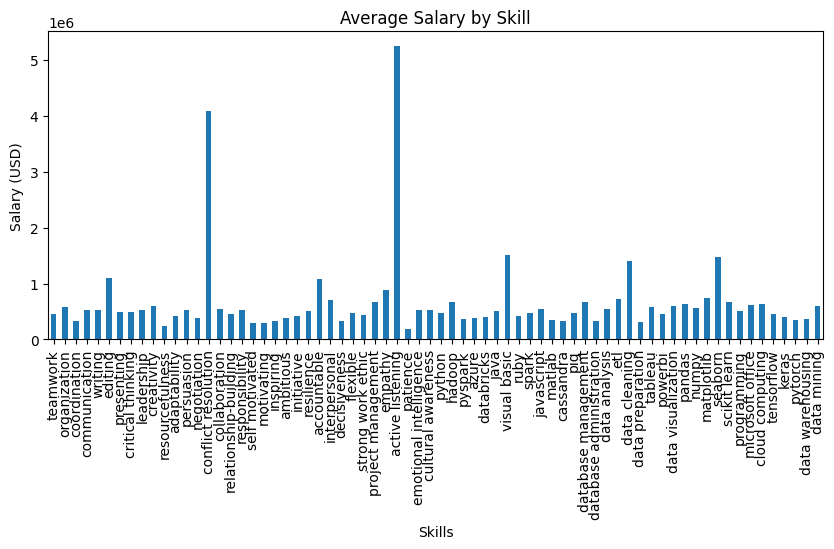

In [369]:
skill_salary.plot.bar(figsize = (10,4), legend = False)

plt.xlabel("Skills")
plt.ylabel("Salary (USD)")
plt.title("Average Salary by Skill")
plt.show()

### Plot Frequency of Skill

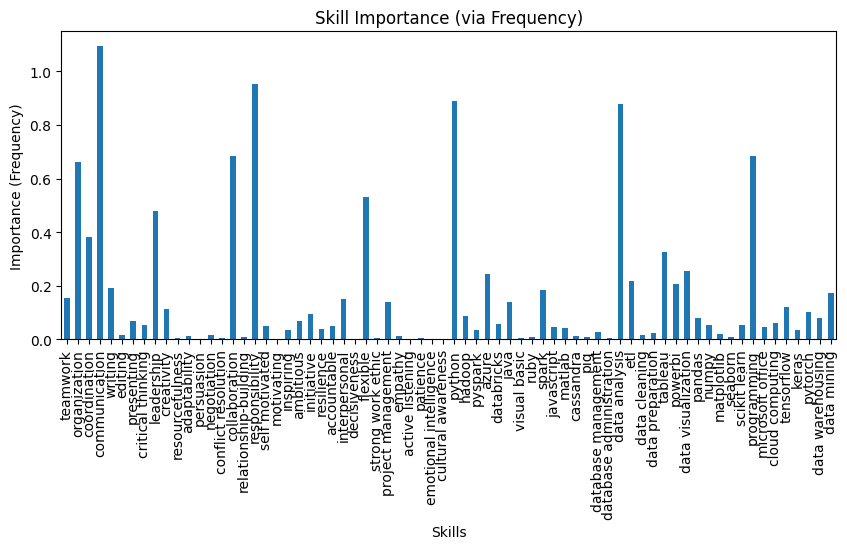

In [370]:

skill_importance.plot.bar(figsize = (10,4), legend = False)

plt.xlabel("Skills")
plt.ylabel("Importance (Frequency)")
plt.title("Skill Importance (via Frequency)")
plt.show()

### Plot Average Rating Associated With Skill

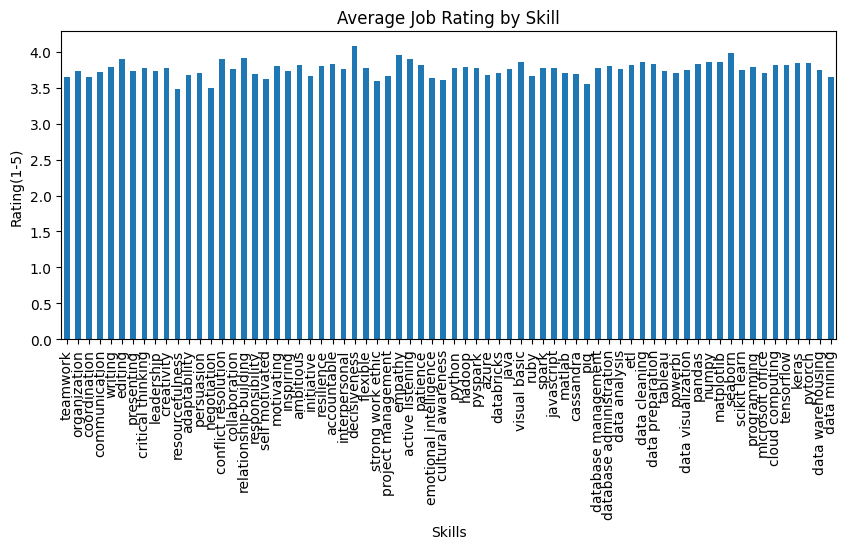

In [371]:

skill_rating.plot.bar( figsize = (10,4), legend = False)
plt.xlabel("Skills")
plt.ylabel("Rating(1-5)")
plt.title("Average Job Rating by Skill")
plt.show()

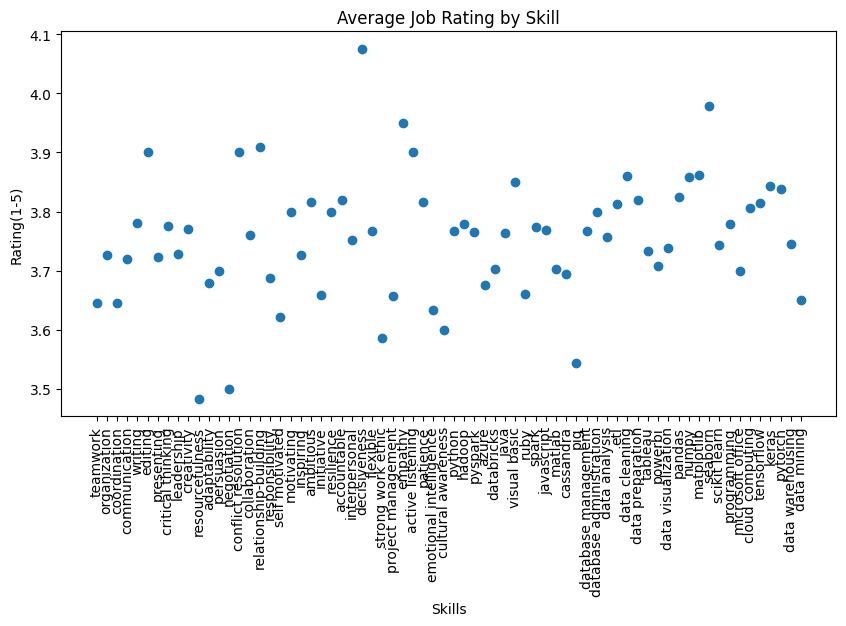

In [372]:
plt.figure(figsize = (10,5) )
plt.scatter(x = skill_rating.index, y = skill_rating.values)
plt.xlabel("Skills")
plt.ylabel("Rating(1-5)")
plt.title("Average Job Rating by Skill")
plt.xticks(rotation = 90)
plt.show()

## Heirarchical Clustering

#### Dendogram

Heirarchical clustering using the distance features as our features

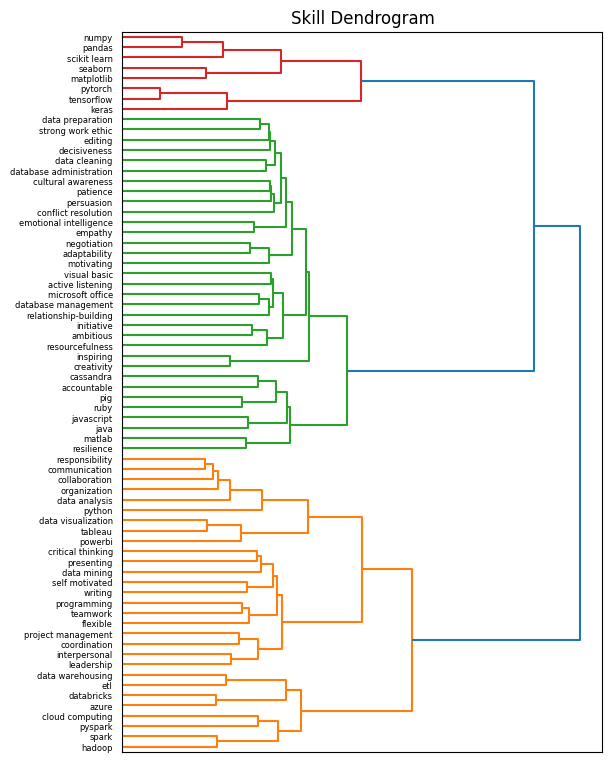

In [373]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

clusters = shc.linkage(distance_df, 
            method='ward', 
            metric="euclidean")
dend = shc.dendrogram(Z=clusters, orientation = "right")
labels = [ distance_df.columns[feature] for feature in dend["leaves"] ]

ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.title("Skill Dendrogram")
plt.show()

#### Curriculum

In [374]:
n_clusters = 8

heirarchy = AgglomerativeClustering(n_clusters = n_clusters).fit(distance_df)

label_series = pd.Series(heirarchy.labels_, index = distance_df.index)

groups = []
for i in range(n_clusters):
  temp = distance_df.loc[label_series == i, :]
  groups.append(list(temp.index))
  


In [375]:
groups

[['organization',
  'communication',
  'collaboration',
  'responsibility',
  'python',
  'data analysis',
  'tableau',
  'powerbi',
  'data visualization'],
 ['editing',
  'resourcefulness',
  'adaptability',
  'persuasion',
  'negotiation',
  'conflict resolution',
  'relationship-building',
  'motivating',
  'ambitious',
  'initiative',
  'decisiveness',
  'strong work ethic',
  'empathy',
  'active listening',
  'patience',
  'emotional intelligence',
  'cultural awareness',
  'visual basic',
  'database management',
  'database administration',
  'data cleaning',
  'data preparation',
  'microsoft office'],
 ['resilience',
  'accountable',
  'java',
  'ruby',
  'javascript',
  'matlab',
  'cassandra',
  'pig'],
 ['hadoop',
  'pyspark',
  'azure',
  'databricks',
  'spark',
  'etl',
  'cloud computing',
  'data warehousing'],
 ['teamwork',
  'coordination',
  'writing',
  'presenting',
  'critical thinking',
  'leadership',
  'self motivated',
  'interpersonal',
  'flexible',
  'pr

Based on cutting the dendogram for eight clusters we get the above group of skills which we can take note of in terms of courses:

- Basic ML and Data Visualization in python (for the [pandas, numpy, matplotlib, seaborn, scikit learn ] 

- Deep Learning with TensorFlow and pytorch

- a basic data analysis course data preparation and cleaning, taking note of good data practices, data ownership etc.

- a course focused on developing skills with Microsoft Office, in particular excl and visual basic

- Introduction to programming with java, ruby etc

- Data Visualization and communication course

- team project based data mining for programming course

- Big Data course using cloup computing software and big data framework

## KMeans Clustering

#### Scaling the Numerical Columns

When working with only the distance features everything has the same scale. Once we start considering other numerical features and the categorical features everything is moved to a different scale of measurement.

To prevent the differences in scale from dominating we normalize the numerical columns in our dataset so the scale and variance do not bias kmeans towards a particular set of features.

In [376]:
numerical_cols = ["salary", "importance", "rating"] + list(distance_df.columns) 

scaler = StandardScaler()
feature_df_scaled = feature_df.copy()

for col in numerical_cols:
  feature_df_scaled[col] = scaler.fit_transform(feature_df[[col]])

#### Selecting K via Elbow Method

In [377]:
def chooseK(klist, features):
  net_dist = []

  factor = len(features.index)
  #Compute sum of distances between centres and points
  for k in klist:
    temp = KMeans(n_clusters = k, n_init = 10, random_state = 1)
    temp.fit(features)

    net_dist.append(temp.inertia_) #Retrieve Within cluster squared distances

  #plot the points
  plt.plot(klist, net_dist)
  plt.title("Intercluster Distances by Number of Clusters")
  plt.xlabel("Number of Clusters")
  plt.ylabel("Distances")
  plt.show()



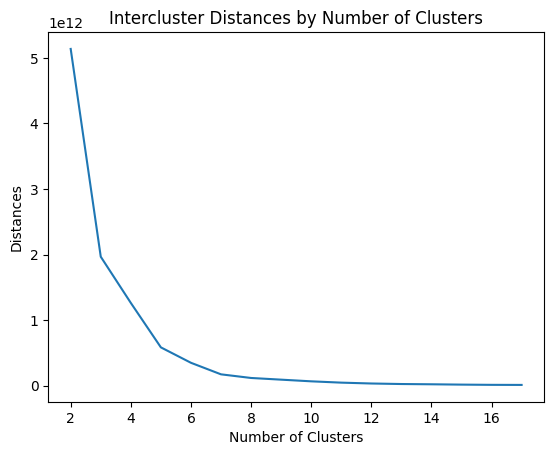

In [378]:
klist = range(2,18)

chooseK(klist, feature_df)

In [379]:
clustering = []

for i in range(0,5):
  clusters = KMeans(n_clusters = i+8, n_init = 10, random_state = 1)
  clusters.fit(feature_df_scaled)
  clustering.append(clusters)

In [380]:
#Plot clusters in 2d

def cluster_proj(km_obj,features, col1, col2):
  
  label_series = pd.Series(km_obj.labels_, index = features.index)

  for label in range(len(km_obj.cluster_centers_)) :
    temp = features.loc[label_series == label, :]
    plt.scatter(temp[col1],temp[col2], label = "Cluster "+ str(label))
  
  plt.legend()
  plt.title("Scatter Plot of Clusters")
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

#Return the names of the features in each cluster

def cluster_groups(km_obj,features):

  groups = []
  label_series = pd.Series(km_obj.labels_, index = features.index)

  for label in range(len(km_obj.cluster_centers_)) :
    temp = features.loc[label_series == label, :]
    groups.append(list(temp.index))

  return groups


#### Scatter Plot of Clusters

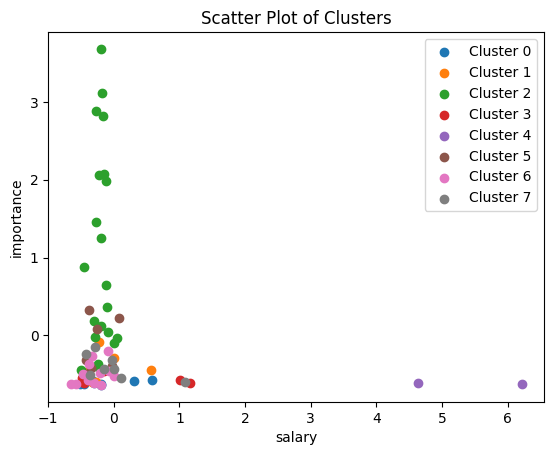

In [381]:
cluster_proj(km_obj = clustering[0],features = feature_df_scaled, col1 = feature_df_scaled.columns[0], col2 = feature_df_scaled.columns[1])

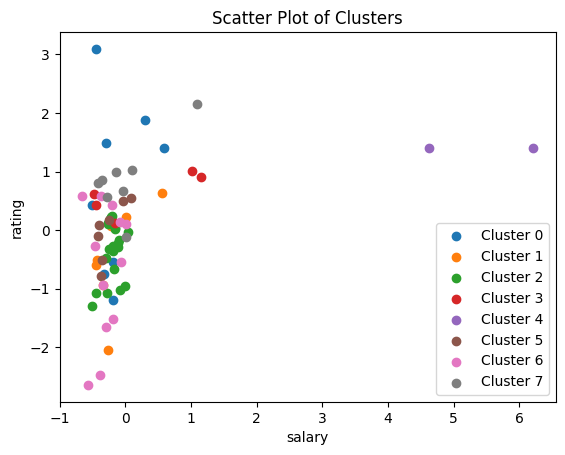

In [382]:
cluster_proj(km_obj = clustering[0],features = feature_df_scaled, col1 = feature_df_scaled.columns[0], col2 = feature_df_scaled.columns[3])

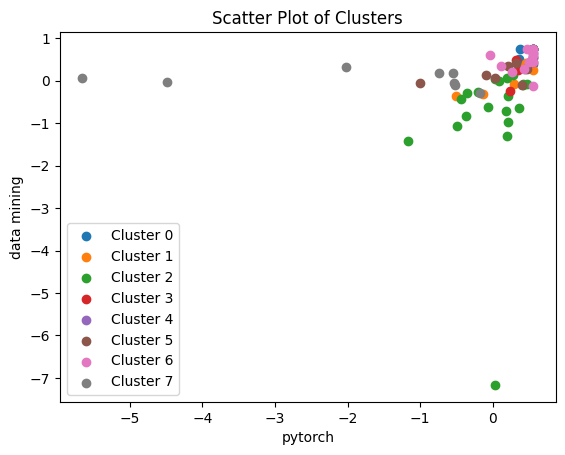

In [383]:
cluster_proj(km_obj = clustering[0],features = feature_df_scaled, col1 = feature_df_scaled.columns[-3], col2 = feature_df_scaled.columns[-1])

#### Curriculum

In [384]:
course_skills = cluster_groups(km_obj = clustering[0],features = feature_df)

In [385]:
course_skills

[['editing',
  'adaptability',
  'persuasion',
  'relationship-building',
  'motivating',
  'decisiveness',
  'empathy',
  'emotional intelligence'],
 ['accountable', 'hadoop', 'java', 'ruby', 'matlab', 'cassandra', 'pig'],
 ['teamwork',
  'organization',
  'coordination',
  'communication',
  'writing',
  'presenting',
  'critical thinking',
  'leadership',
  'collaboration',
  'responsibility',
  'self motivated',
  'interpersonal',
  'flexible',
  'project management',
  'python',
  'data analysis',
  'tableau',
  'powerbi',
  'data visualization',
  'programming',
  'data mining'],
 ['visual basic',
  'javascript',
  'database administration',
  'data cleaning',
  'data preparation'],
 ['conflict resolution', 'active listening'],
 ['pyspark',
  'azure',
  'databricks',
  'spark',
  'etl',
  'cloud computing',
  'data warehousing'],
 ['creativity',
  'resourcefulness',
  'negotiation',
  'inspiring',
  'ambitious',
  'initiative',
  'resilience',
  'strong work ethic',
  'patience',

Based on the above groups we can have the following courses:

- an introduction to data science course focused on data preparation and the use of scikitlearn and hadoop frameworks in preparing data

- a conflict resolution and interpersonal relationships course

- a team based variation of the introduction to data science course (perhaps an intermediate course)

- programming in visualbasic and using excel to prepare data

- active listening seminar course

- writing and editing course focused on interpretation

- database SQL and NoSQL course

- another group programming course, focusing on using java and developing data visualizations

The Hierarchical clusters offer more intuitive and better varied courses here, and would be the choice of curriculum to expand on.